In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

# 1. Data

1.1 Data Load\
손글씨 데이터는 0~9까지의 숫자를 손으로 쓴 데이터 입니다.\
데이터는 sklearn.datasets의 load_digits를 이용해 받을 수 있음

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
data, target = digits['data'], digits['target']

1.2 Data EDA\
데이터는 각 픽셀의 값을 나타냄

In [6]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]), 0)

데이터의 크기를 확인하면 64인데 이는 8*8 이미지를 flatten 시켰기 때문임

In [7]:
data[0].shape

(64,)

실제로 0~9까지 데이터를 시각화하면 다음과 같이 나타남

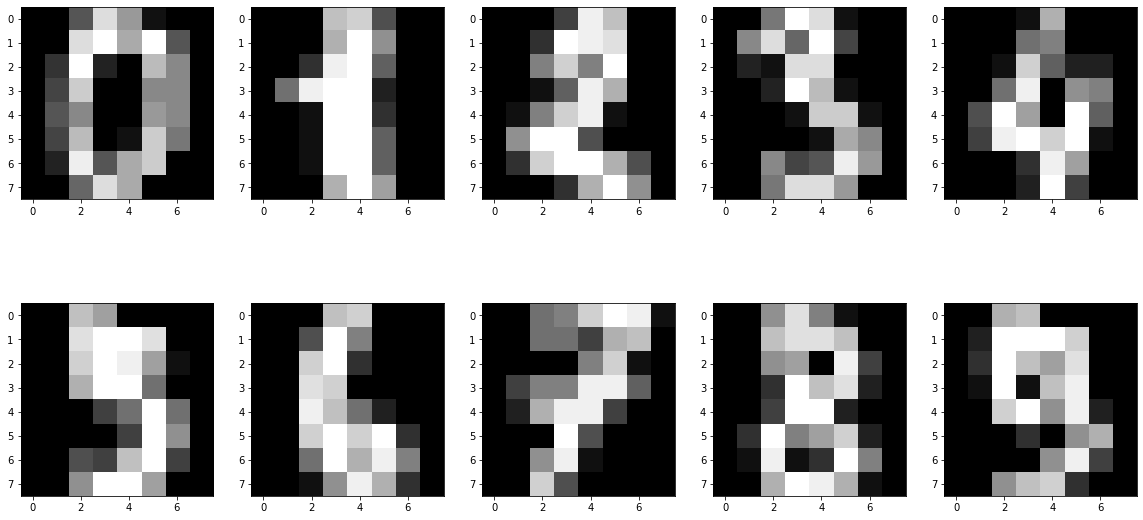

In [10]:
samples = data[:10].reshape(10,8,8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
for idx, sample in enumerate(samples):
  axes[idx//5, idx%5].imshow(sample, cmap ="gray")

1.3 Data split\
데이터를 Train, Test로 나누겠습니다.

In [11]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size = 0.7, random_state = 2021)

In [12]:
print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_Data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 1257, 0.70
test_Data size: 540, 0.30


# 2. Random Foreset

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

2.1 학습

In [14]:
random_forest.fit(train_data, train_target)

RandomForestClassifier()

2. Feature Importance

In [16]:
feature_importance = pd.Series(random_forest.feature_importances_)

In [17]:
feature_importance.head(10)

0    0.000000
1    0.002220
2    0.020109
3    0.010783
4    0.009515
5    0.023636
6    0.009311
7    0.000669
8    0.000009
9    0.008824
dtype: float64

In [19]:
feature_importance = feature_importance.sort_values(ascending=False)

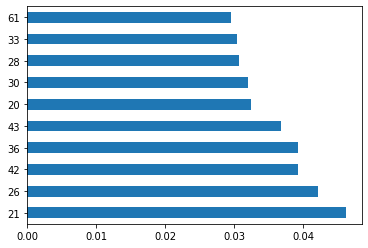

In [20]:
feature_importance.head(10).plot(kind="barh")

(-0.5, 7.5, 7.5, -0.5)

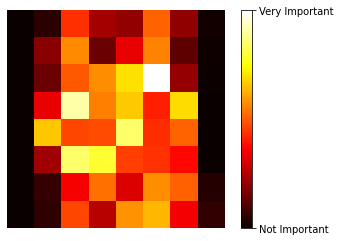

In [27]:
image = random_forest.feature_importances_.reshape(8, 8)

plt.imshow(image, cmap=plt.cm.hot, interpolation="nearest")
cbar= plt.colorbar(ticks =[random_forest.feature_importances_.min(), random_forest.feature_importances_.max()])
cbar.ax.set_yticklabels(["Not Important", "Very Important"])
plt.axis("off")

# 검은색은 제일 중요하지 않고, 밝은색이 제일 중요함

2.3 예측

In [28]:
train_pred = random_forest.predict(train_data)
test_pred = random_forest.predict(test_data)

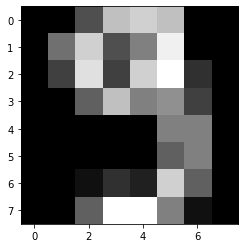

In [29]:
# 실제 데이터를 한번 그려보기

plt.imshow(train_data[4].reshape(8,8), cmap="gray")

In [30]:
train_pred[4]

9

2.4 평가

In [33]:
from sklearn.metrics import accuracy_score

train_acs = accuracy_score(train_target, train_pred)
test_acs = accuracy_score(test_target, test_pred)

In [34]:
print(f"train accuracy is {train_acs:.4f}")
print(f"test accuracy is {test_acs:.4f}")

train accuracy is 1.0000
test accuracy is 0.9667


3.RandomForestClassifier에서 주로 탐색하는 argument들은 다음과 같음
- n_estimante
 - 몇 개의 나무를 생성할 것인지를 정함

- criterion
 - 어떤 정보 이득을 기준으로 데이터를 나눌지 정함
 - "gini", "entropy"

- max_depth
 - 나무의 최대 길이를 정함

- min_samples_split
 - 노드가 나눠질 수 있는 최소 데이터 개수를 정함



In [ ]:
# 탐색해야할 argument들이 많을 때 일일이 지정하거나 for loop을 작성하기 힘들어짐
# 이 때 사용할 수 있는 것이 sklearn.model_selection 의 GridSeachCV함수임


In [35]:
from sklearn.model_selection import GridSearchCV

3.1 탐색할 범위 선정

In [36]:
# 탐색할 값들의 argument와 범위 정함

params = {"n_estimators": [i for i in range(100, 1000, 200)],
          "max_depth": [i for i in range(10, 50, 10)],
          }

In [37]:
params

{'n_estimators': [100, 300, 500, 700, 900], 'max_depth': [10, 20, 30, 40]}

In [38]:
# 탐샘 사용할 모델을 생성
random_forest = RandomForestClassifier()

3.2 탐색

탐색을 시작\
cv는 k=fold의 k값임

In [39]:
grid = GridSearchCV(estimator=random_forest, param_grid=params, cv=3)
grid = grid.fit(train_data, train_target)

3.3 결과

In [41]:
print(f"Best score of parameter search is:{grid.best_score_:.4f}")

Best score of parameter search is:0.9730


In [44]:
print("Best parameter of best score is")
print(f"\t max_depth: {grid.best_params_['max_depth']}")
print(f"\t n_estimators: {grid.best_params_['n_estimators']}")

Best parameter of best score is
	 max_depth: 30
	 n_estimators: 300


In [45]:
best_rf = grid.best_estimator_

In [46]:
best_rf

RandomForestClassifier(max_depth=30, n_estimators=300)

3.4 예측

In [49]:
train_pred = best_rf.predict(train_data)
test_pred = best_rf.predict(test_data)

3.5 평가

In [51]:
best_train_acc = accuracy_score(train_target, train_pred)
best_test_acc = accuracy_score(test_target, test_pred)

In [52]:
print(f"Best_parameter train accuracy is {best_train_acc:.4f}")
print(f"Best parameter test accuracy is {best_test_acc:.4f}")

Best_parameter train accuracy is 1.0000
Best parameter test accuracy is 0.9704


4. Feature Importance

In [53]:
best_feature_importance = pd.Series(best_rf.feature_importances_)

In [54]:
best_feature_importance = best_feature_importance.sort_values(ascending=False)

In [56]:
best_feature_importance.head(10)

21    0.045323
26    0.044439
43    0.043824
36    0.040624
42    0.035054
28    0.033223
20    0.030152
30    0.029488
27    0.028930
60    0.028078
dtype: float64

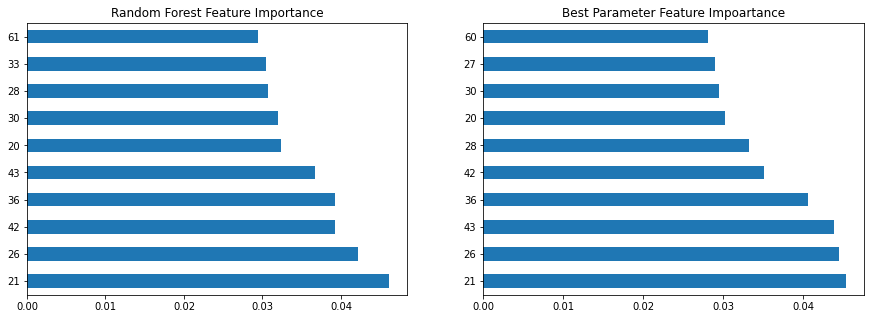

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
feature_importance.head(10).plot(kind="barh", ax=axes[0], title="Random Forest Feature Importance")
best_feature_importance.head(10).plot(kind = "barh", ax=axes[1], title = "Best Parameter Feature Impoartance")